In [682]:
import pandas as pd
from helper import *

import folium
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [802]:
df = pd.read_csv("../data/complaints.csv")

In [803]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [804]:
df.head()

Date received                                            Product  \
0    2019-09-24                                    Debt collection   
1    2019-09-19  Credit reporting, credit repair services, or o...   
2    2019-11-08                                    Debt collection   
3    2021-05-31  Credit reporting, credit repair services, or o...   
4    2021-05-31  Credit reporting, credit repair services, or o...   

        Sub-product                                 Issue  \
0     I do not know     Attempts to collect debt not owed   
1  Credit reporting  Incorrect information on your report   
2     I do not know                 Communication tactics   
3  Credit reporting  Incorrect information on your report   
4  Credit reporting  Incorrect information on your report   

                             Sub-issue  \
0                    Debt is not yours   
1  Information belongs to someone else   
2           Frequent or repeated calls   
3  Information belongs to someone else   
4  Information belongs to someone else   

                        Consumer complaint narrative  \
0  transworld systems inc. \nis trying to collect...   
1                                                NaN   
2  Over the past 2 weeks, I have been receiving e...   
3                                                NaN   
4                                                NaN   

                             Company public response  \
0                                                NaN   
1  Company has responded to the consumer and the ...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                  Company State ZIP code Tags  \
0                  TRANSWORLD SYSTEMS INC    FL    335XX  NaN   
1     Experian Information Solutions Inc.    PA    15206  NaN   
2           Diversified Consultants, Inc.    NC    275XX  NaN   
3  TRANSUNION INTERMEDIATE HOLDINGS, INC.    AL    354XX  NaN   
4  TRANSUNION INTERMEDIATE HOLDINGS, INC.    CA    913XX  NaN   

  Consumer consent provided? Submitted via Date sent to company  \
0           Consent provided           Web           2019-09-24   
1       Consent not provided           Web           2019-09-20   
2           Consent provided           Web           2019-11-08   
3                        NaN           Web           2021-05-31   
4                        NaN           Web           2021-05-31   

      Company response to consumer Timely response? Consumer disputed?  \
0          Closed with explanation              Yes                NaN   
1  Closed with non-monetary relief              Yes                NaN   
2          Closed with explanation              Yes                NaN   
3                      In progress              Yes                NaN   
4                      In progress              Yes                NaN   

   Complaint ID  
0       3384392  
1       3379500  
2       3433198  
3       4417969  
4       4418076

In [805]:
df.shape

(2105254, 18)

In [806]:
state_count = df.groupby('State').count().reset_index()

In [807]:
df.groupby('State').count().reset_index().Product.sum()

2064874

In [808]:
state_count['percent'] = state_count.Product/df.groupby('State').count().reset_index().Product.sum()

In [809]:
state_count

State  Date received  Product  Sub-product  Issue  Sub-issue  \
0     AA             46       46           44     46         26   
1     AE            666      666          567    666        432   
2     AK           2111     2111         1802   2111       1432   
3     AL          32617    32617        29944  32617      26943   
4     AP            455      455          369    455        304   
..   ...            ...      ...          ...    ...        ...   
58    VT           2181     2181         1821   2181       1156   
59    WA          34604    34604        30234  34604      21458   
60    WI          18723    18723        16215  18723      11923   
61    WV           4158     4158         3485   4158       2783   
62    WY           1697     1697         1431   1697       1148   

    Consumer complaint narrative  Company public response  Company  ZIP code  \
0                             24                       16       46        45   
1                            258                      267      666       661   
2                            736                      882     2111      1909   
3                          10052                    14917    32617     27386   
4                            193                      187      455       449   
..                           ...                      ...      ...       ...   
58                           591                      613     2181      1683   
59                         11997                    13306    34604     31952   
60                          6379                     7105    18723     16614   
61                          1458                     1506     4158      3223   
62                           639                      620     1697      1472   

    Tags  Consumer consent provided?  Submitted via  Date sent to company  \
0     13                          37             46                    46   
1    488                         476            666                   666   
2    505                        1389           2111                  2111   
3   3430                       24735          32617                 32617   
4    324                         328            455                   455   
..   ...                         ...            ...                   ...   
58   350                        1000           2181                  2181   
59  5316                       20867          34604                 34604   
60  2328                       11456          18723                 18723   
61   825                        2411           4158                  4158   
62   354                        1096           1697                  1697   

    Company response to consumer  Timely response?  Consumer disputed?  \
0                             46                46                  13   
1                            666               666                 317   
2                           2111              2111                 871   
3                          32617             32617                8080   
4                            455               455                 223   
..                           ...               ...                 ...   
58                          2181              2181                1223   
59                         34604             34604               16067   
60                         18723             18723                8209   
61                          4158              4158                1966   
62                          1697              1697                 761   

    Complaint ID   percent  
0             46  0.000022  
1            666  0.000323  
2           2111  0.001022  
3          32617  0.015796  
4            455  0.000220  
..           ...       ...  
58          2181  0.001056  
59         34604  0.016758  
60         18723  0.009067  
61          4158  0.002014  
62          1697  0.000822  

[63 rows x 19 columns]

In [810]:
df['Date received'] = pd.to_datetime(df['Date received'], format='%Y-%m-%d')

In [811]:
df['Date received'] = df['Date received'].dt.strftime("%m-%d-%y")

In [812]:
df['Date received'] = pd.to_datetime(df['Date received'], format='%m-%d-%y')

In [813]:
df[(df['Date received'] == '09-08-17') &  (df.Product == 'Credit reporting, credit repair services, or other personal consumer reports')].groupby('Issue').count()['Date received']

Issue
Confusing or misleading advertising or marketing                                       4
Credit monitoring or identity theft protection services                              190
Fraud or scam                                                                          3
Identity theft protection or other monitoring services                                15
Improper use of your report                                                         2335
Incorrect information on your report                                                 223
Problem with a company's investigation into an existing issue                          8
Problem with a credit reporting company's investigation into an existing problem     204
Problem with customer service                                                          2
Problem with fraud alerts or security freezes                                         98
Unable to get your credit report or credit score                                      19
Name: Date rece

In [814]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105254 entries, 0 to 2105253
Data columns (total 18 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date received                 datetime64[ns]
 1   Product                       object        
 2   Sub-product                   object        
 3   Issue                         object        
 4   Sub-issue                     object        
 5   Consumer complaint narrative  object        
 6   Company public response       object        
 7   Company                       object        
 8   State                         object        
 9   ZIP code                      object        
 10  Tags                          object        
 11  Consumer consent provided?    object        
 12  Submitted via                 object        
 13  Date sent to company          object        
 14  Company response to consumer  object        
 15  Timely response?              ob

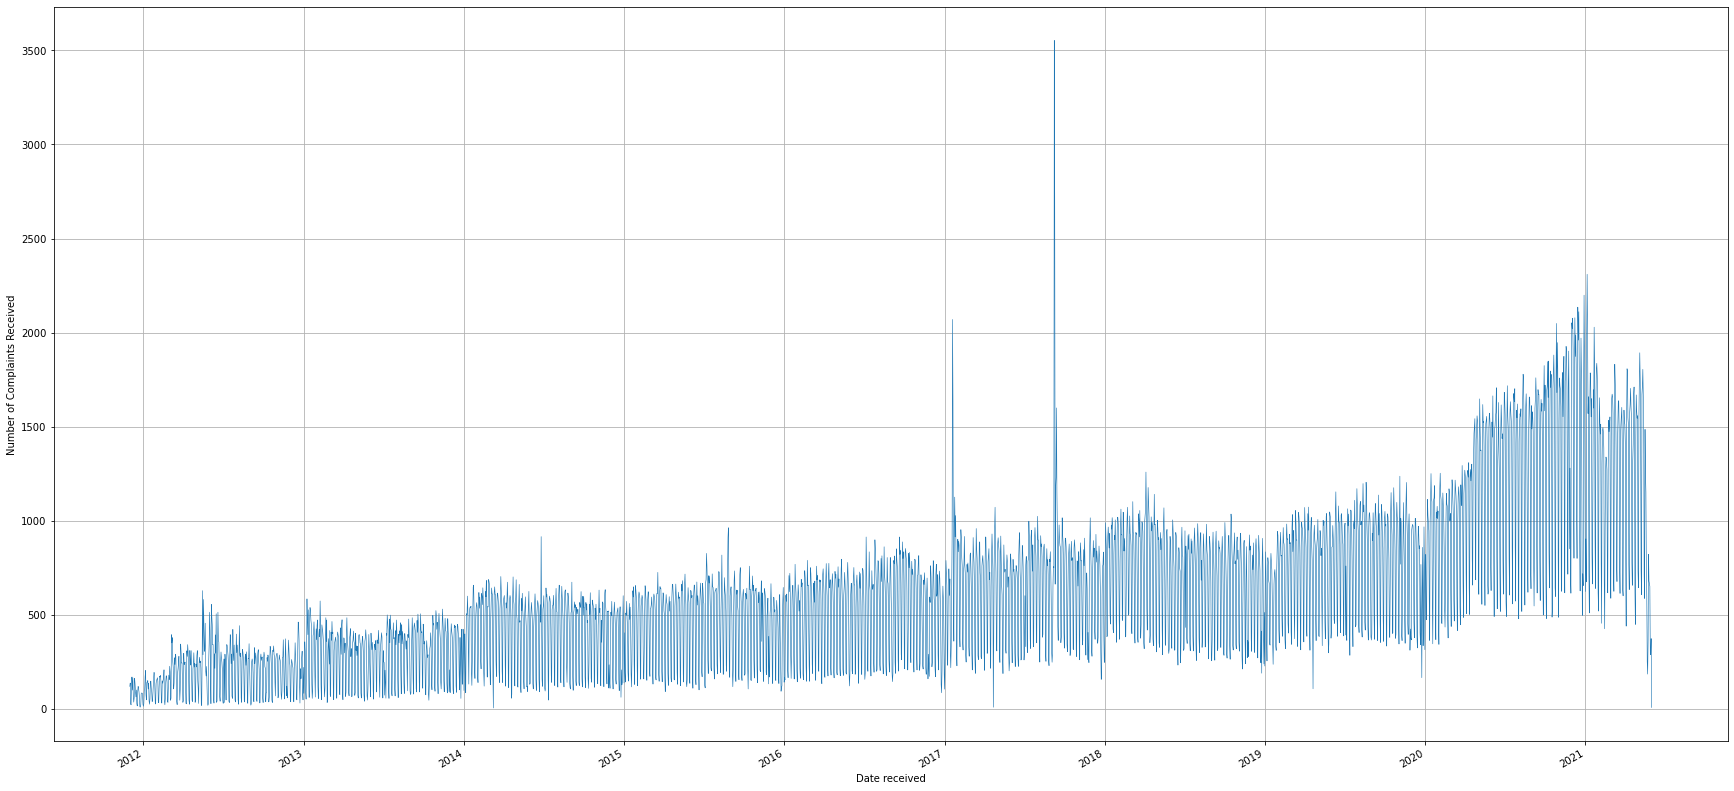

In [815]:
plt.rcParams["figure.figsize"] = [30, 15]
df.groupby('Date received').count().Product.plot.line(linewidth=0.6)
plt.ylabel('Number of Complaints Received')
plt.grid()
plt.savefig('img/timeseries')
plt.show()

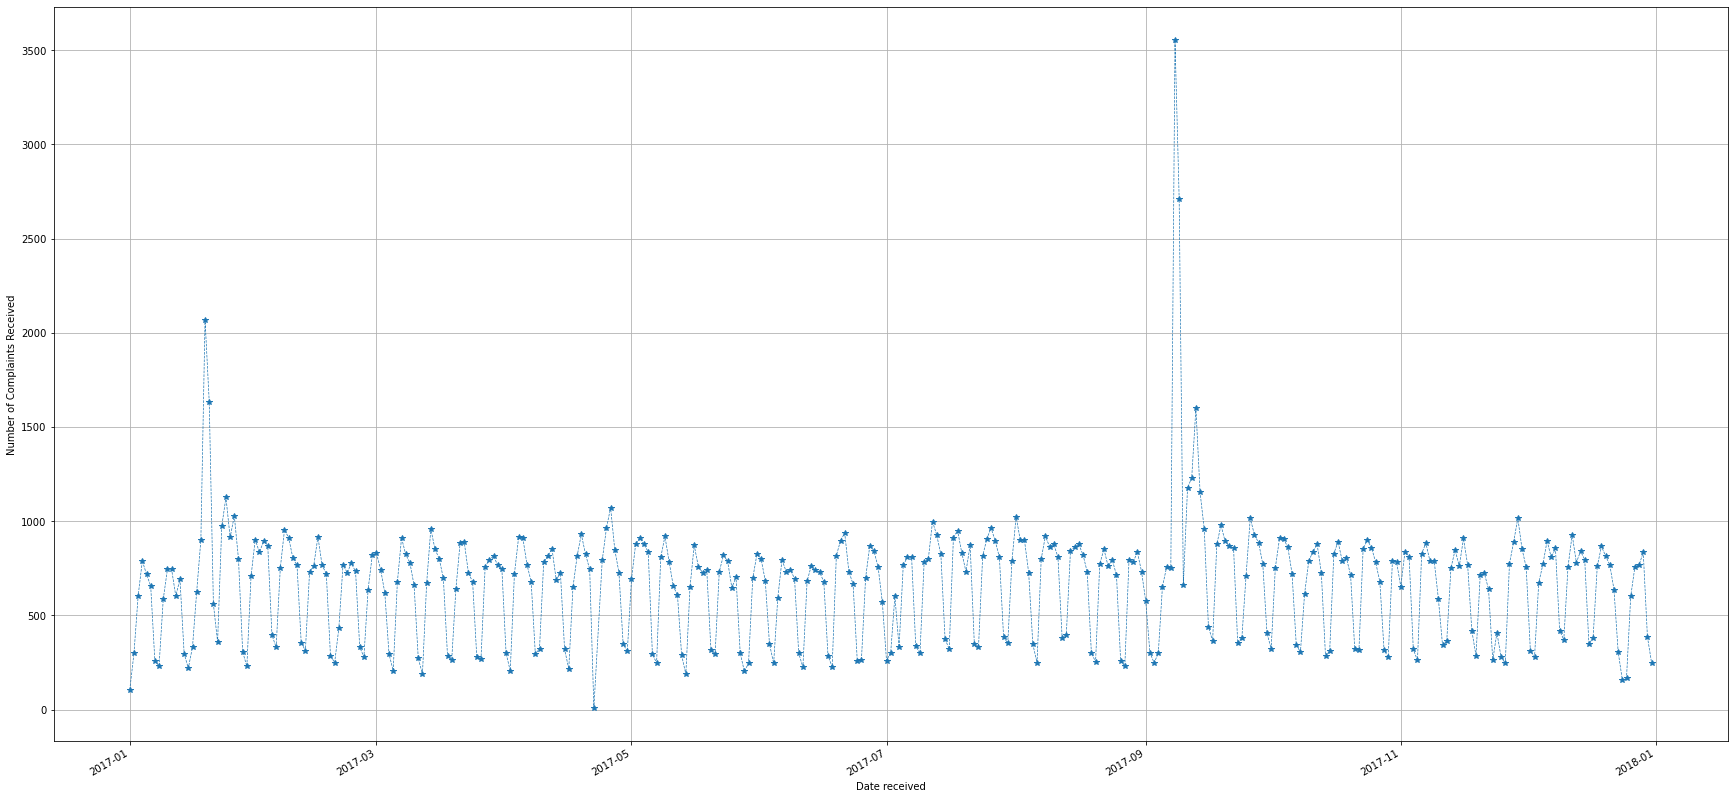

In [816]:
plt.rcParams["figure.figsize"] = [30, 15]
df[(df['Date received'] > '12-31-16') & (df['Date received'] < '01-01-18')].groupby('Date received').count().Product.plot(linewidth = .7, style = '*--')
plt.ylabel('Number of Complaints Received')
plt.grid()
plt.savefig('img/timeseries_2017')
# Peak date: 2017-09-08

In [769]:
m = folium.Map(location=[40, -95], zoom_start=4)

In [770]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

In [771]:
folium.GeoJson(state_geo).add_to(m)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_count,
    columns=['State', 'percent'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Complaint % by State'
).add_to(m)

In [772]:
m

In [775]:
# save folium as png
m.save('img/population_folium.html')

In [702]:
population_state = pd.read_csv("../data/population_state.csv")

In [703]:
population_state = population_state[:56]

In [704]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'U.S. Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [705]:

lst = []
for full in population_state.State:
    lst.append(us_state_abbrev[full])


In [706]:
# State full name to abbreviation
population_state.State = lst

In [707]:
population_state['Population estimate, July 1, 2019[2]'] = population_state['Population estimate, July 1, 2019[2]'].str.replace(',','')

In [708]:
population_state['Population estimate, July 1, 2019[2]'] = population_state['Population estimate, July 1, 2019[2]'].astype(int)

In [709]:
population_state.columns

Index(['Rank in states & territories, 2019',
       'Rank in states & territories, 2010', 'State',
       'Population estimate, July 1, 2019[2]',
       'Census population, April 1, 2010[3]',
       'Percent change, 2010–2019[note 1]', 'Absolute change, 2010-2019',
       'Total seats in the U.S. House of Representatives, 2013–2023',
       'Estimated population per electoral vote, 2019[note 2]',
       'Estimated population per House seat, 2019',
       'Census population per House seat, 2010',
       'Percent of the total U.S. population, 2018[note 3]'],
      dtype='object')

In [710]:
population_state= population_state[['State','Population estimate, July 1, 2019[2]']].rename(columns={'Population estimate, July 1, 2019[2]':'Population'})

In [711]:
geo_df = state_count.merge(population_state, on ='State')[['State', 'Date received', 'Population']]

In [712]:
geo_df['Standardized'] = geo_df['Date received']/geo_df['Population']

In [818]:
geo_df.sort_values(by='Standardized', ascending=False)

State  Date received  Population  Standardized
8     DC          10236      705749      0.014504
11    GA         117610    10617423      0.011077
10    FL         228261    21477737      0.010628
9     DE           9821      973764      0.010086
22    MD          55511     6045680      0.009182
36    NV          28018     3080156      0.009096
34    NJ          74238     8882190      0.008358
37    NY         141751    19453561      0.007287
5     CA         274565    39512223      0.006949
47    TX         193529    28995881      0.006674
1     AL          32617     4903185      0.006652
44    SC          33376     5148714      0.006482
49    VA          55292     8535519      0.006478
41    PA          81325    12801989      0.006353
20    LA          28910     4648794      0.006219
16    IL          77803    12671821      0.006140
30    NC          63138    10488084      0.006020
7     CT          20917     3565287      0.005867
46    TN          39944     6833174      0.005846
4     AZ          40290     7278717      0.005535
21    MA          36716     6949503      0.005283
2     AR          15678     3017825      0.005195
43    RI           5392     1059361      0.005090
6     CO          29255     5758736      0.005080
38    OH          58794    11689100      0.005030
33    NH           6192     1359711      0.004554
26    MO          27932     6137428      0.004551
52    WA          34604     7614893      0.004544
24    MI          45375     9986857      0.004543
28    MS          13301     2976149      0.004469
48    UT          13914     3205958      0.004340
40    OR          17530     4217737      0.004156
13    HI           5684     1415872      0.004014
35    NM           7668     2096829      0.003657
50    VI            371      104914      0.003536
51    VT           2181      623989      0.003495
25    MN          19551     5639632      0.003467
23    ME           4626     1344212      0.003441
53    WI          18723     5822434      0.003216
17    IN          21364     6732219      0.003173
18    KS           8874     2913314      0.003046
39    OK          11984     3956971      0.003029
15    ID           5344     1787065      0.002990
55    WY           1697      578759      0.002932
0     AK           2111      731545      0.002886
19    KY          12810     4467673      0.002867
29    MT           2794     1068778      0.002614
32    NE           4963     1934408      0.002566
45    SD           2054      884659      0.002322
54    WV           4158     1792147      0.002320
14    IA           7173     3155070      0.002273
31    ND           1708      762062      0.002241
42    PR           5427     3193694      0.001699
12    GU            223      165718      0.001346
27    MP             35       55194      0.000634
3     AS             32       55641      0.000575

In [776]:
m = folium.Map(location=[40, -95], zoom_start=4)

In [777]:
folium.GeoJson(state_geo).add_to(m)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=geo_df,
    columns=['State', 'Standardized'],
    key_on='feature.id',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Complaints over Population'
).add_to(m)

In [779]:
m

In [780]:
# save folium as png
m.save('img/complaint_folium.html')

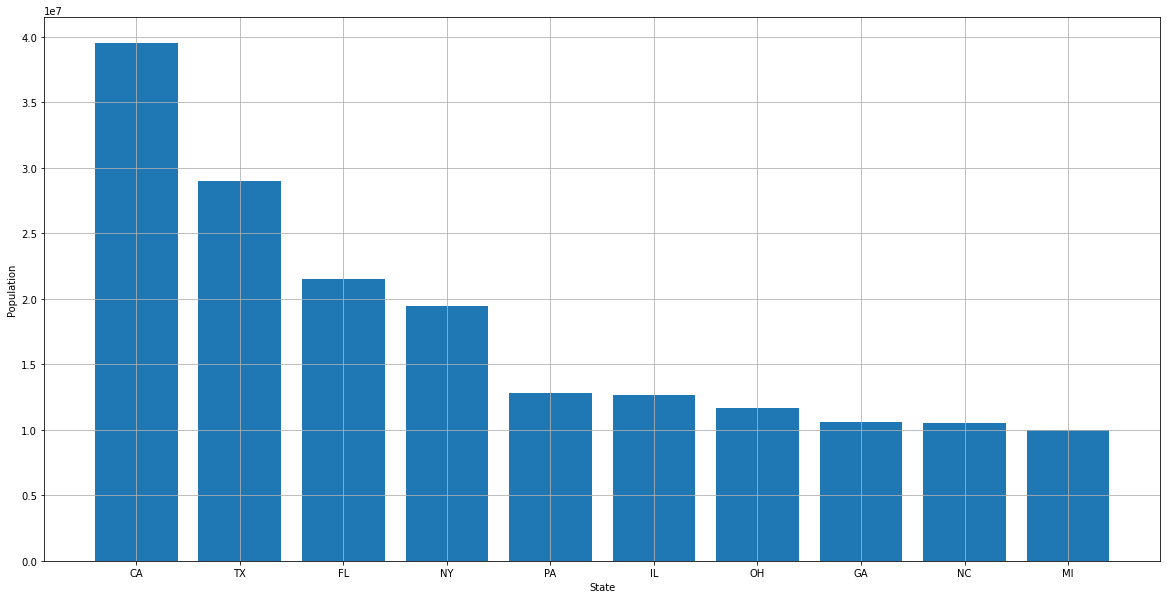

In [781]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(x=population_state.State[:10], height = population_state['Population'][:10])
plt.xlabel('State')
plt.ylabel('Population')
plt.grid()
plt.savefig('img/popluation_bar')
plt.show()

In [789]:
df.groupby('Submitted via').count().Product

Submitted via
Email              423
Fax              25657
Phone           115137
Postal mail      79944
Referral        212261
Web            1671832
Name: Product, dtype: int64

In [790]:
labels = list(df.groupby('Submitted via').count().index[1:])
sizes = list(df.groupby('Submitted via').count().Product[1:])


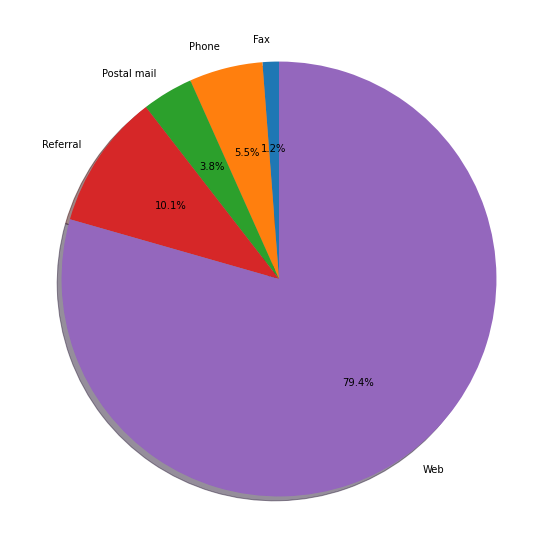

In [791]:
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.savefig('img/pie')
plt.show()

In [756]:
df.Product

0                                            Debt collection
2                                            Debt collection
14         Credit reporting, credit repair services, or o...
15         Credit reporting, credit repair services, or o...
19         Credit reporting, credit repair services, or o...
                                 ...                        
2105249                                        Consumer Loan
2105250                                      Debt collection
2105251                                             Mortgage
2105252                                             Mortgage
2105253                                          Credit card
Name: Product, Length: 725242, dtype: object

In [757]:
df = df[df['Consumer complaint narrative'].isnull() == False]

In [759]:
clean_documents_sample = []
for document in list(df['Consumer complaint narrative']):
    clean_documents_sample.append(no_tokenize(document))

In [760]:
df['Consumer complaint narrative'] = clean_documents_sample

In [761]:
df.head()

Date received                                            Product  \
0     2019-09-24                                    Debt collection   
2     2019-11-08                                    Debt collection   
14    2019-07-26  Credit reporting, credit repair services, or o...   
15    2019-07-08  Credit reporting, credit repair services, or o...   
19    2019-11-22  Credit reporting, credit repair services, or o...   

         Sub-product                                              Issue  \
0      I do not know                  Attempts to collect debt not owed   
2      I do not know                              Communication tactics   
14  Credit reporting  Problem with a credit reporting company's inve...   
15  Credit reporting  Problem with a credit reporting company's inve...   
19  Credit reporting               Incorrect information on your report   

                                            Sub-issue  \
0                                   Debt is not yours   
2                          Frequent or repeated calls   
14  Their investigation did not fix an error on yo...   
15  Their investigation did not fix an error on yo...   
19                     Personal information incorrect   

                         Consumer complaint narrative  \
0   transworld system inc tri collect debt mine ow...   
2   past 2 week receiv excess amount telephon call...   
14  previous xxxxxxxx xxxxxxxx xxxxxxxx request ex...   
15  hello complaint three credit report compani xx...   
19  today xxxxxxxx went onlin disput incorrect per...   

                              Company public response  \
0                                                 NaN   
2                                                 NaN   
14  Company has responded to the consumer and the ...   
15  Company has responded to the consumer and the ...   
19  Company has responded to the consumer and the ...   

                                   Company State ZIP code Tags  \
0                   TRANSWORLD SYSTEMS INC    FL    335XX  NaN   
2            Diversified Consultants, Inc.    NC    275XX  NaN   
14     Experian Information Solutions Inc.    CA    914XX  NaN   
15  TRANSUNION INTERMEDIATE HOLDINGS, INC.    NY    109XX  NaN   
19  TRANSUNION INTERMEDIATE HOLDINGS, INC.    FL    330XX  NaN   

   Consumer consent provided? Submitted via Date sent to company  \
0            Consent provided           Web           2019-09-24   
2            Consent provided           Web           2019-11-08   
14           Consent provided           Web           2019-07-26   
15           Consent provided           Web           2019-07-08   
19           Consent provided           Web           2019-11-22   

   Company response to consumer Timely response? Consumer disputed?  \
0       Closed with explanation              Yes                NaN   
2       Closed with explanation              Yes                NaN   
14      Closed with explanation              Yes                NaN   
15      Closed with explanation              Yes                NaN   
19      Closed with explanation              Yes                NaN   

    Complaint ID  
0        3384392  
2        3433198  
14       3319331  
15       3299394  
19       3446975

In [762]:
delete_sensor = []
for document in list(df['Consumer complaint narrative']):
    delete_sensor.append(re.sub("xx", "", document).strip())

In [763]:
df['Consumer complaint narrative'] = delete_sensor

In [764]:
df.head()

Date received                                            Product  \
0     2019-09-24                                    Debt collection   
2     2019-11-08                                    Debt collection   
14    2019-07-26  Credit reporting, credit repair services, or o...   
15    2019-07-08  Credit reporting, credit repair services, or o...   
19    2019-11-22  Credit reporting, credit repair services, or o...   

         Sub-product                                              Issue  \
0      I do not know                  Attempts to collect debt not owed   
2      I do not know                              Communication tactics   
14  Credit reporting  Problem with a credit reporting company's inve...   
15  Credit reporting  Problem with a credit reporting company's inve...   
19  Credit reporting               Incorrect information on your report   

                                            Sub-issue  \
0                                   Debt is not yours   
2                          Frequent or repeated calls   
14  Their investigation did not fix an error on yo...   
15  Their investigation did not fix an error on yo...   
19                     Personal information incorrect   

                         Consumer complaint narrative  \
0   transworld system inc tri collect debt mine ow...   
2   past 2 week receiv excess amount telephon call...   
14  previous    request experian send copi verifi ...   
15  hello complaint three credit report compani  t...   
19  today  went onlin disput incorrect person info...   

                              Company public response  \
0                                                 NaN   
2                                                 NaN   
14  Company has responded to the consumer and the ...   
15  Company has responded to the consumer and the ...   
19  Company has responded to the consumer and the ...   

                                   Company State ZIP code Tags  \
0                   TRANSWORLD SYSTEMS INC    FL    335XX  NaN   
2            Diversified Consultants, Inc.    NC    275XX  NaN   
14     Experian Information Solutions Inc.    CA    914XX  NaN   
15  TRANSUNION INTERMEDIATE HOLDINGS, INC.    NY    109XX  NaN   
19  TRANSUNION INTERMEDIATE HOLDINGS, INC.    FL    330XX  NaN   

   Consumer consent provided? Submitted via Date sent to company  \
0            Consent provided           Web           2019-09-24   
2            Consent provided           Web           2019-11-08   
14           Consent provided           Web           2019-07-26   
15           Consent provided           Web           2019-07-08   
19           Consent provided           Web           2019-11-22   

   Company response to consumer Timely response? Consumer disputed?  \
0       Closed with explanation              Yes                NaN   
2       Closed with explanation              Yes                NaN   
14      Closed with explanation              Yes                NaN   
15      Closed with explanation              Yes                NaN   
19      Closed with explanation              Yes                NaN   

    Complaint ID  
0        3384392  
2        3433198  
14       3319331  
15       3299394  
19       3446975

In [765]:
stopwords = set(STOPWORDS)

In [766]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        #mask = np.array(Image.open("customer.png"))
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.savefig('img/wordcloud_' + str(title) )
    plt.imshow(wordcloud)
    plt.show()

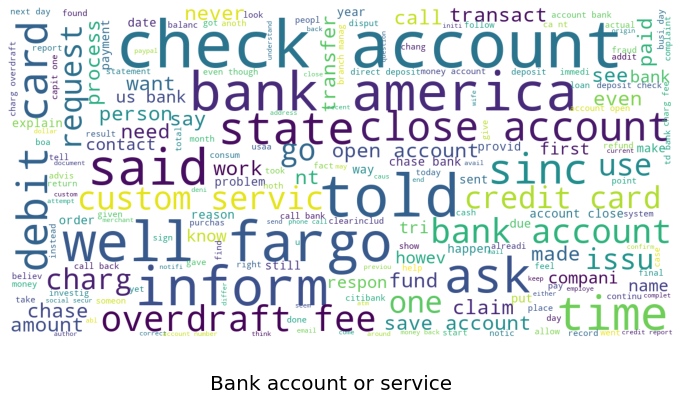

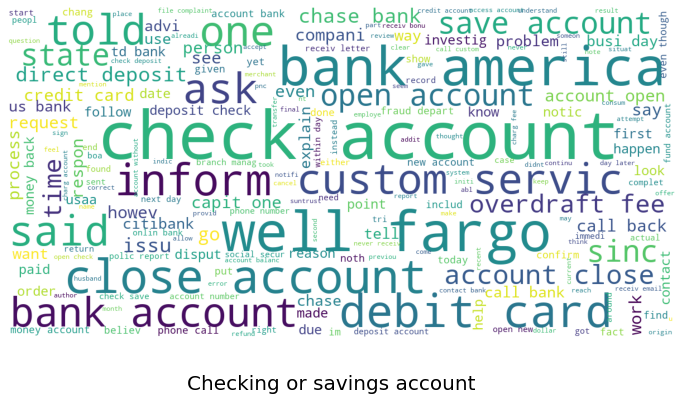

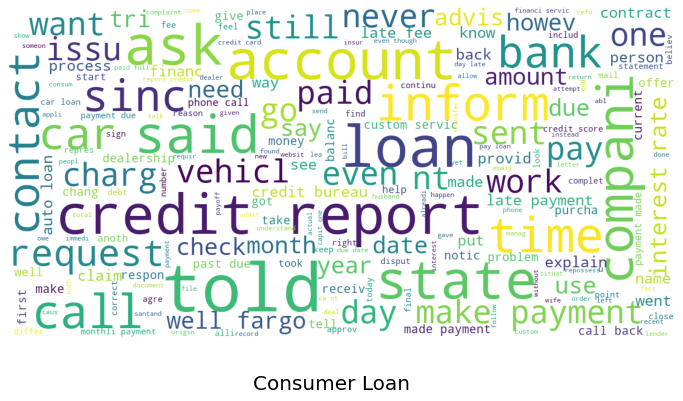

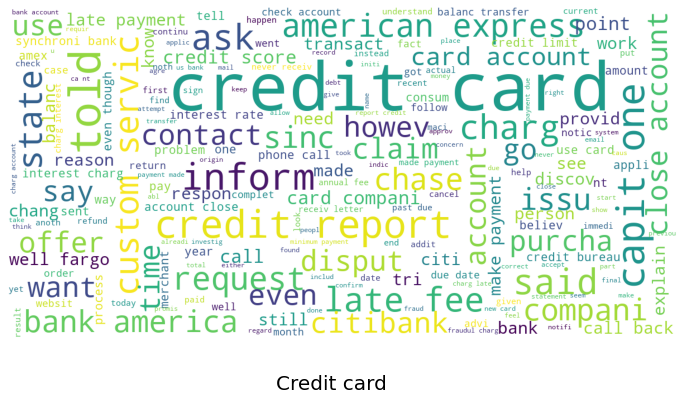

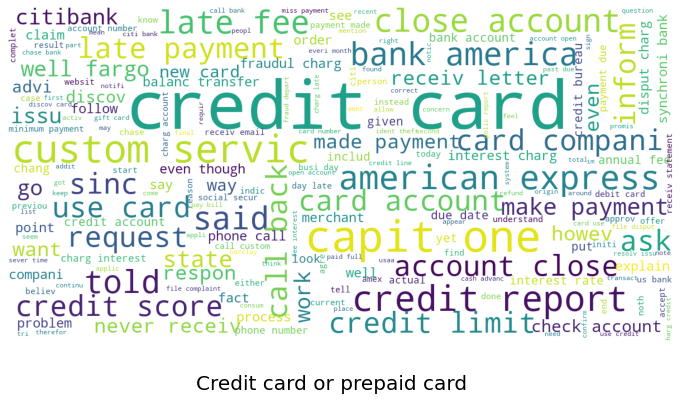

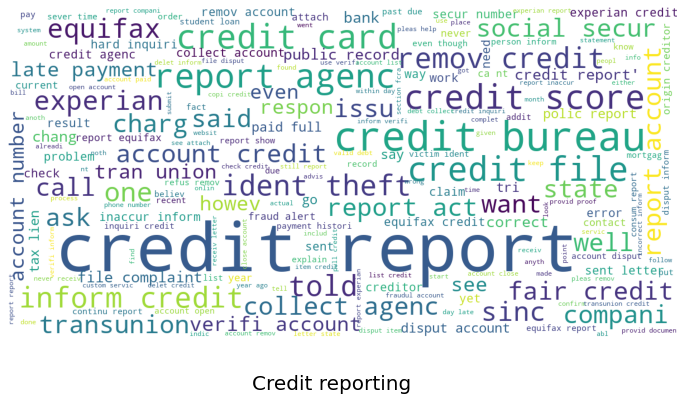

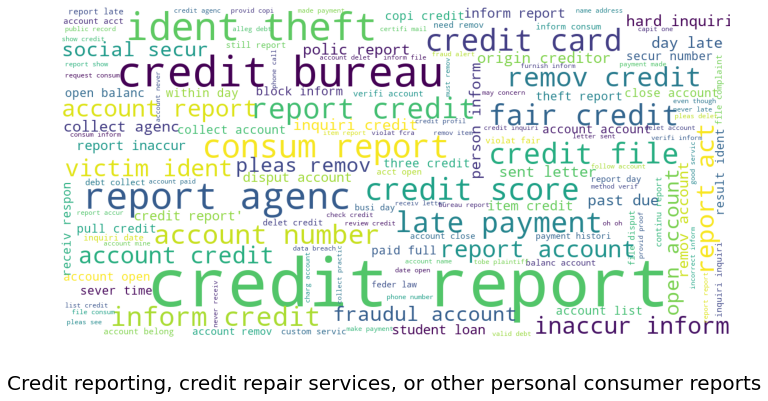

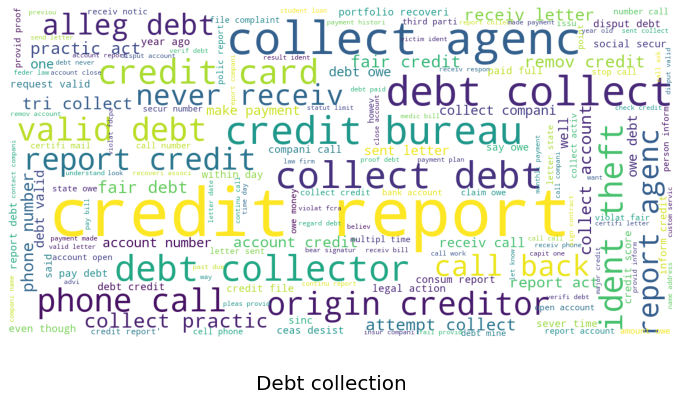

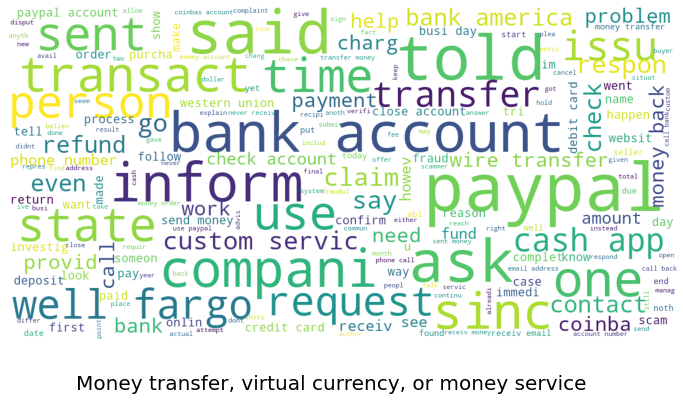

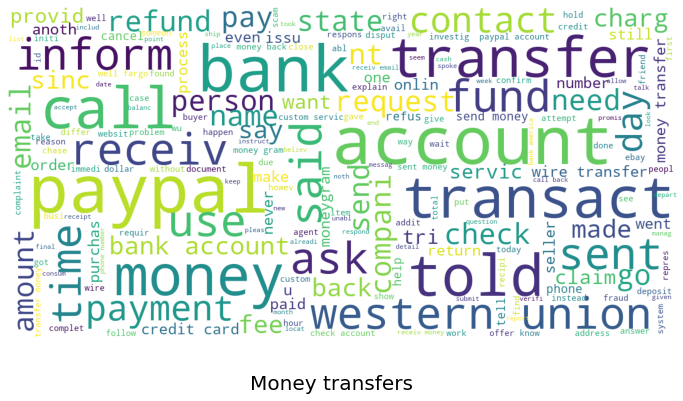

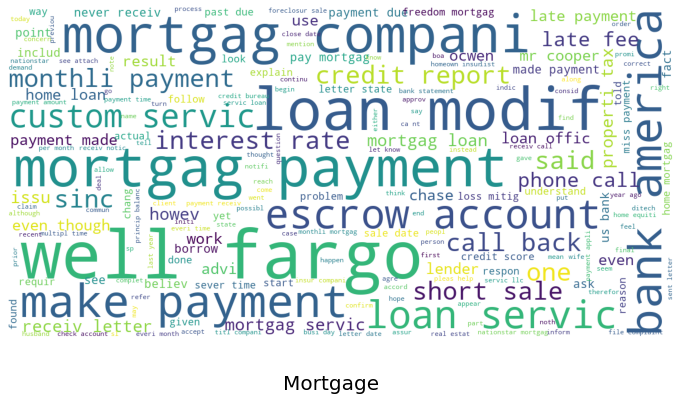

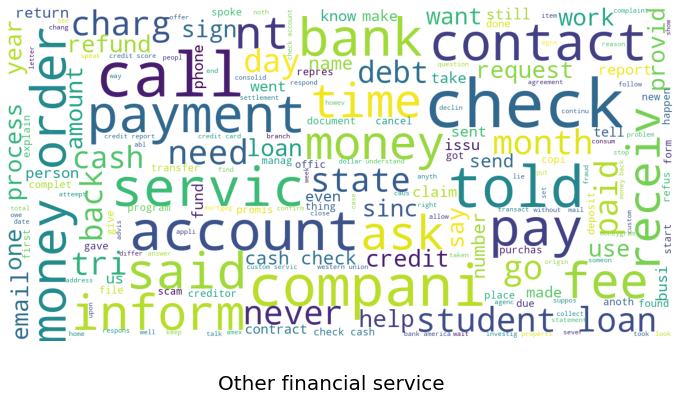

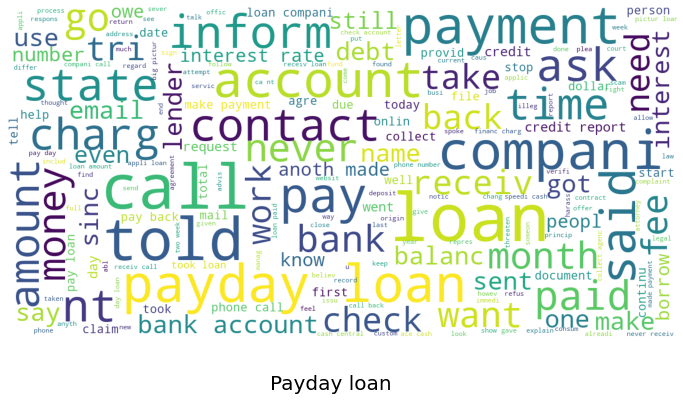

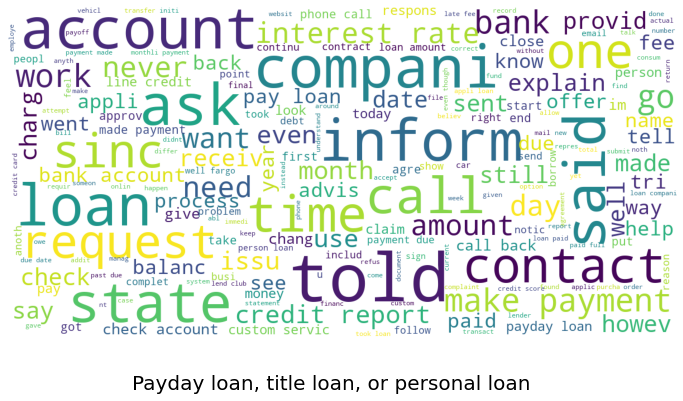

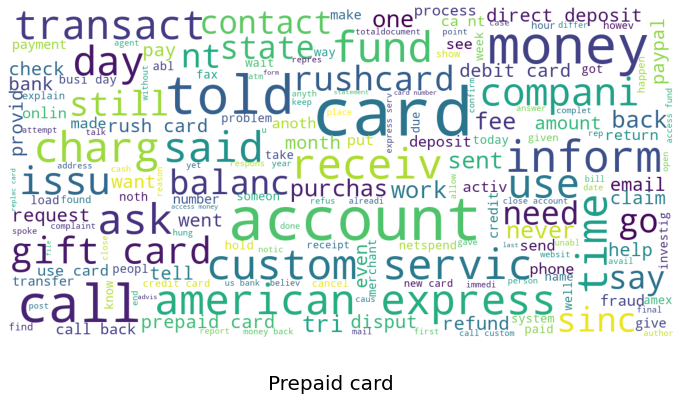

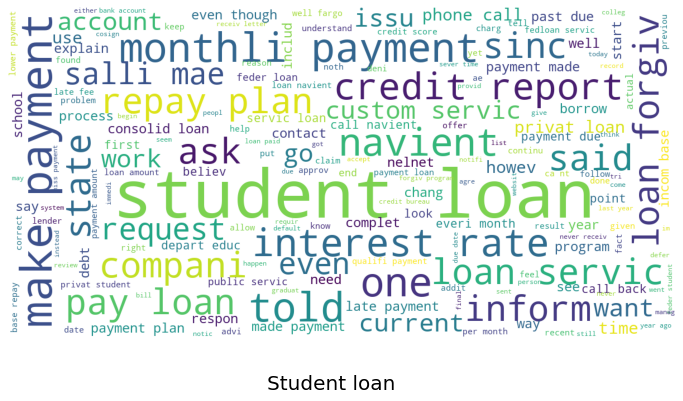

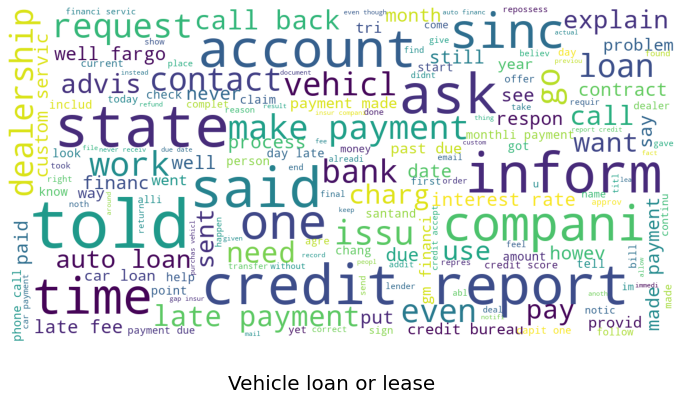

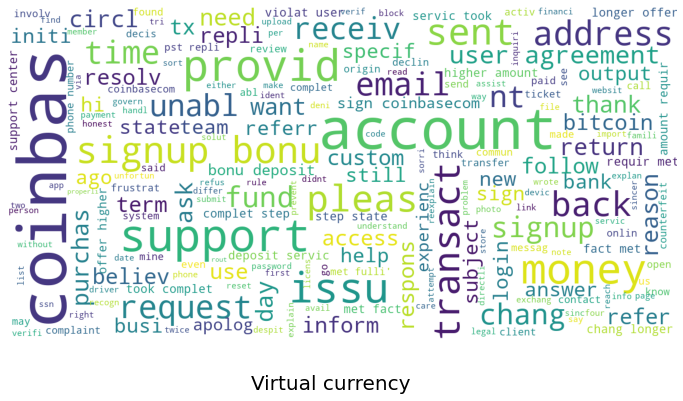

Empty DataFrame
Columns: []
Index: []

In [767]:
df.groupby('Product').apply(
    lambda x: show_wordcloud(x['Consumer complaint narrative'].tolist(), title=f"{x.name}")
)

## tfidf vectorizer

In [171]:
vectorizer = TfidfVectorizer()

In [172]:
X = vectorizer.fit_transform(delete_sensor)

In [173]:
X

<725242x182351 sparse matrix of type '<class 'numpy.float64'>'
	with 39572134 stored elements in Compressed Sparse Row format>

In [174]:
y= df.Product.array

In [178]:
tsvd = TruncatedSVD(n_components=200)

In [179]:
X_tsvd = tsvd.fit_transform(X)

In [191]:
X_tsvd.shape

(725242, 200)

In [209]:
d = pd.DataFrame(X_tsvd)

In [211]:
d['category'] = y

In [223]:
d.groupby('category').mean().T

category  Bank account or service  Checking or savings account  Consumer Loan  \
0                        0.191170                     0.193701       0.192671   
1                       -0.106397                    -0.103514      -0.111551   
2                       -0.038450                    -0.036609      -0.014741   
3                        0.125988                     0.140136      -0.044878   
4                        0.006709                     0.007619       0.002576   
..                            ...                          ...            ...   
195                      0.001959                     0.001904      -0.001547   
196                      0.001296                     0.001262      -0.000876   
197                     -0.002402                    -0.000160       0.003019   
198                      0.002694                     0.002483      -0.000883   
199                      0.000290                     0.000815       0.001716   

category  Credit card  Credit card or prepaid card  Credit reporting  \
0            0.213609                     0.212160          0.243646   
1           -0.087554                    -0.093907          0.079204   
2           -0.041433                    -0.042946         -0.012727   
3            0.049281                     0.056489         -0.020166   
4            0.014026                     0.016921          0.013449   
..                ...                          ...               ...   
195         -0.000192                     0.001033         -0.000382   
196         -0.000519                    -0.000224          0.001516   
197         -0.001332                     0.001076         -0.000158   
198         -0.001870                     0.000208         -0.001818   
199          0.000656                    -0.000965          0.002761   

category  Credit reporting, credit repair services, or other personal consumer reports  \
0                                                  0.248680                              
1                                                  0.080670                              
2                                                 -0.030166                              
3                                                 -0.012860                              
4                                                  0.007555                              
..                                                      ...                              
195                                               -0.000361                              
196                                                0.000628                              
197                                                0.000233                              
198                                               -0.000347                              
199                                                0.000349                              

category  Debt collection  Money transfer, virtual currency, or money service  \
0                0.218176                                           0.158887    
1               -0.013442                                          -0.089147    
2                0.116504                                          -0.012014    
3                0.007617                                           0.096268    
4               -0.002354                                           0.020809    
..                    ...                                                ...    
195             -0.000155                                          -0.007253    
196             -0.000535                                           0.005915    
197             -0.001120                                           0.000251    
198             -0.000885                                          -0.003996    
199             -0.000051                                           0.000846    

category  Money transfers  Mortgage  Other financial service  Payday loan  \
0                0.153588  0.18

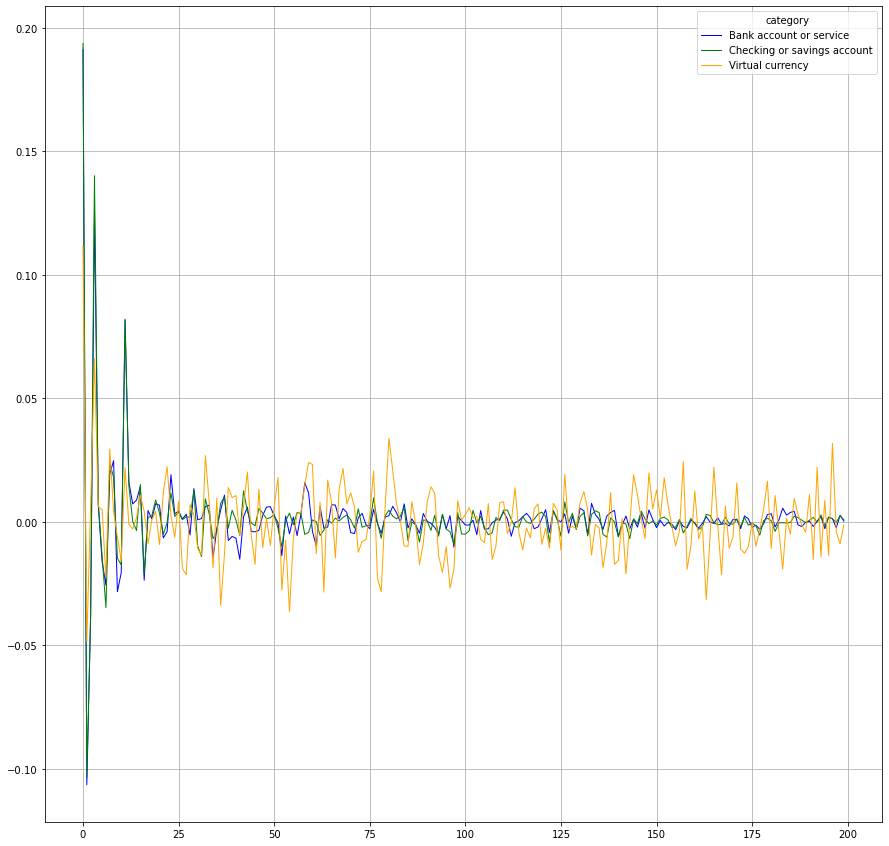

In [798]:
plt.rcParams["figure.figsize"] = [15, 15]
d.groupby('category').mean().T[['Bank account or service','Checking or savings account', 'Virtual currency']].plot.line(linewidth=1, color = ['b','g','orange'])
plt.grid()
plt.savefig('img/line_3topics')
plt.show()

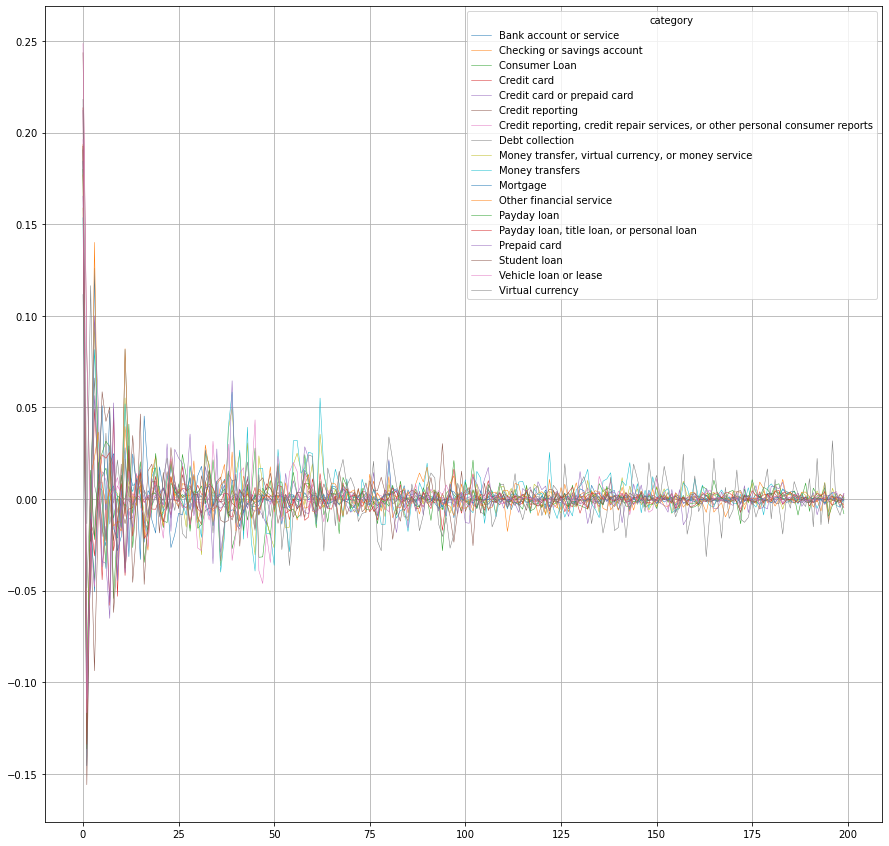

In [797]:
plt.rcParams["figure.figsize"] = [15, 15]
d.groupby('category').mean().T.plot.line(linewidth=0.5)
plt.grid()
plt.savefig('img/all_lines')
plt.show()

## heatmap styles: 
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [822]:
d.groupby('category').mean().T

category  Bank account or service  Checking or savings account  Consumer Loan  \
0                        0.191170                     0.193701       0.192671   
1                       -0.106397                    -0.103514      -0.111551   
2                       -0.038450                    -0.036609      -0.014741   
3                        0.125988                     0.140136      -0.044878   
4                        0.006709                     0.007619       0.002576   
..                            ...                          ...            ...   
195                      0.001959                     0.001904      -0.001547   
196                      0.001296                     0.001262      -0.000876   
197                     -0.002402                    -0.000160       0.003019   
198                      0.002694                     0.002483      -0.000883   
199                      0.000290                     0.000815       0.001716   

category  Credit card  Credit card or prepaid card  Credit reporting  \
0            0.213609                     0.212160          0.243646   
1           -0.087554                    -0.093907          0.079204   
2           -0.041433                    -0.042946         -0.012727   
3            0.049281                     0.056489         -0.020166   
4            0.014026                     0.016921          0.013449   
..                ...                          ...               ...   
195         -0.000192                     0.001033         -0.000382   
196         -0.000519                    -0.000224          0.001516   
197         -0.001332                     0.001076         -0.000158   
198         -0.001870                     0.000208         -0.001818   
199          0.000656                    -0.000965          0.002761   

category  Credit reporting, credit repair services, or other personal consumer reports  \
0                                                  0.248680                              
1                                                  0.080670                              
2                                                 -0.030166                              
3                                                 -0.012860                              
4                                                  0.007555                              
..                                                      ...                              
195                                               -0.000361                              
196                                                0.000628                              
197                                                0.000233                              
198                                               -0.000347                              
199                                                0.000349                              

category  Debt collection  Money transfer, virtual currency, or money service  \
0                0.218176                                           0.158887    
1               -0.013442                                          -0.089147    
2                0.116504                                          -0.012014    
3                0.007617                                           0.096268    
4               -0.002354                                           0.020809    
..                    ...                                                ...    
195             -0.000155                                          -0.007253    
196             -0.000535                                           0.005915    
197             -0.001120                                           0.000251    
198             -0.000885                                          -0.003996    
199             -0.000051                                           0.000846    

category  Money transfers  Mortgage  Other financial service  Payday loan  \
0                0.153588  0.18

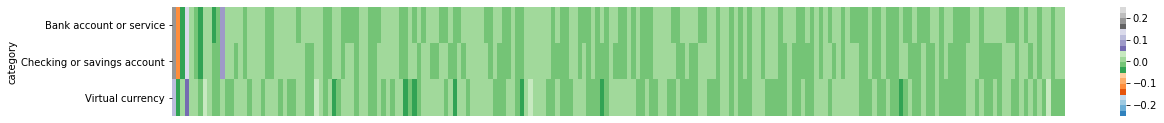

In [836]:
plt.figure(figsize=(20,2))
sns.heatmap(d.groupby('category').mean().loc[['Bank account or service','Checking or savings account', 'Virtual currency']], 
            vmin=-0.25, vmax=0.25, cmap='tab20c')
plt.xticks([])
plt.savefig('img/topics_heat_3')
plt.show()

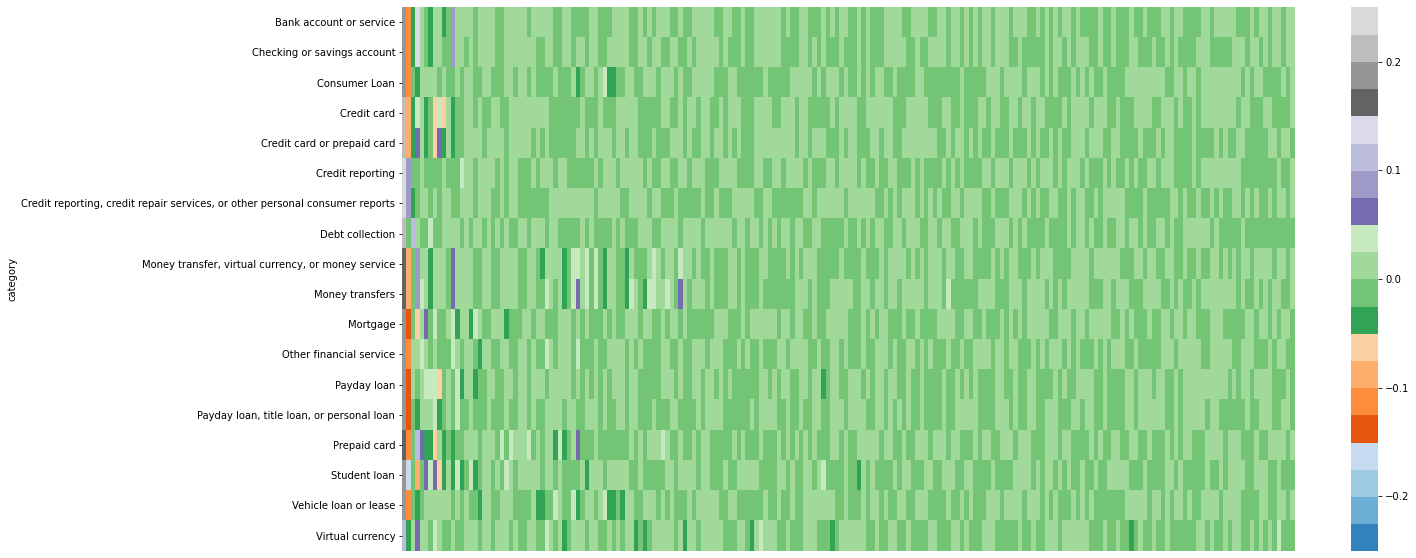

In [796]:
plt.figure(figsize=(20,10))
sns.heatmap(d.groupby('category').mean(), 
            vmin=-0.25, vmax=0.25, cmap='tab20c')
plt.xticks([])
plt.savefig('img/topics_heat')
plt.show()